## Классификация отзывов ресторана на положительные и отрицательные.

Для обработки текста импортируем `nltk` и установим набор данных `stopwords`:

In [1]:
import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Далее поработаем с данными:

In [3]:
import pandas as pd

Загружаем датасет с отзывами:

In [4]:
dataset = pd.read_csv('Restaurant_Reviews.tsv.txt', delimiter='\t', quoting=3)

In [5]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


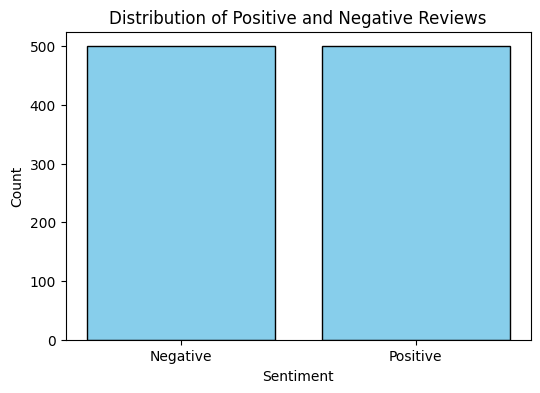

In [6]:
import matplotlib.pyplot as plt

# Подсчет количества положительных и отрицательных отзывов
positive_count = (dataset['Liked'] == 1).sum()
negative_count = (dataset['Liked'] == 0).sum()

# График количества положительных и отрицательных отзывов
plt.figure(figsize=(6, 4))
plt.bar(['Negative', 'Positive'], [negative_count, positive_count], color='skyblue', edgecolor='black')
plt.title('Distribution of Positive and Negative Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Проверим данные на дублирование:

In [7]:
duplicates = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 4


In [8]:
duplicates = dataset[dataset.duplicated(keep=False)]
print(duplicates)

                                Review  Liked
334                 I love this place.      1
380                   I won't be back.      0
383             The food was terrible.      0
505  I would not recommend this place.      0
814                 I love this place.      1
816             The food was terrible.      0
843                   I won't be back.      0
846  I would not recommend this place.      0


In [9]:
len(dataset)

1000

Удалим дубликаты:

In [10]:
dataset = dataset.drop_duplicates().reset_index(drop=True)

In [11]:
len(dataset)

996

Импортируем stopwords, чтобы в дальнейшем удалить из текста стоп-слова (например, "the"):

In [12]:
from nltk.corpus import stopwords

Импортируем PorterStemmer для приведения слов к корневой форме.
<br>Это нужно для сокращения количества слов, чтобы ускоренить обработку.
<br><br>Примеры:
<br>running, run => run,
<br>totally, total => total

In [13]:
from nltk.stem.porter import PorterStemmer

In [14]:
ps = PorterStemmer()

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  996 non-null    object
 1   Liked   996 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


Видим 996 записей, давайте удалим стоп-слова и применим стемминг:

In [16]:
corpus = [] # обработанные отзывы

import re

# Обрабатываем каждый отзыв в датасете
for i in range(0, 996):
    # Убираем символы, кроме букв (избавимя от точек, восклицательных знаков и прочего)
    customer_review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    # Приводим текст в нижний регистр
    customer_review = customer_review.lower()
    # Разделим все предложения на пробелы чтобы вывести слова
    customer_review = customer_review.split()
    # Удаляем стоп-слова и применяем стемминг
    clean_review = [ps.stem(word) for word in customer_review if not word in set(stopwords.words('english'))]
    # Объединяем обратно в строку
    clean_review = ' '.join(clean_review)
    corpus.append(clean_review)


Посмотрим на первые 10 очищенных отзывов:

In [17]:
corpus[0:10]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

Преобразуем текст в числовой формат с помощью TF-IDF

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1500, min_df=3, max_df=0.6)
X = vectorizer.fit_transform(corpus).toarray()

X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Целевые значения - это метки "Liked" (положительный/отрицательный отзыв):

In [20]:
y = dataset.iloc[:, 1].values

In [21]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

Разделяем данные на обучающую и тестовую выборки:

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Импортируем torch для создания нейросети:

In [23]:
import torch
import torch.nn as nn
from torch.nn import functional as F

Преобразуем данные в формат тензоров для работы с PyTorch:

In [24]:
Xtrain_ = torch.from_numpy(X_train).float()
Xtest_ = torch.from_numpy(X_test).float()

ytrain_ = torch.from_numpy(y_train)
ytest_ = torch.from_numpy(y_test)

Посмотрим размерности наших данных:

In [25]:
Xtrain_.shape, ytrain_.shape

(torch.Size([796, 467]), torch.Size([796]))

In [26]:
Xtest_.shape, ytest_.shape

(torch.Size([200, 467]), torch.Size([200]))

Определяем параметры нейронной сети:

In [27]:
input_size = 467
output_size = 2
hidden_size = 500

Определяем архитектуру нейронной сети:

In [28]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Первый полносвязный слой
        self.fc1 = torch.nn.Linear(input_size, hidden_size)
        # Второй полносвязный слой
        self.fc2 = torch.nn.Linear(hidden_size, hidden_size)
        # Третий полносвязный слой для классификации
        self.fc3 = torch.nn.Linear(hidden_size, output_size)

    def forward(self, X):
        # Применяем функцию активации ReLU после каждого слоя
        X = torch.relu(self.fc1(X))
        X = torch.relu(self.fc2(X))
        # На выходе логарифмируем softmax для получения вероятностей классов
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

Создаем модель:

In [29]:
model = Net()

Определяем оптимизатор и функцию потерь:

In [30]:
import torch.optim as optim

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.NLLLoss()

Тренируем модель в течение 100 эпох:

In [31]:
epochs = 100

for epoch in range(epochs):
    optimizer.zero_grad()
    Ypred = model(Xtrain_)
    loss = loss_fn(Ypred, ytrain_)
    loss.backward()
    optimizer.step()
    print('Epoch', epoch, 'loss', loss.item())


Epoch 0 loss 0.6931027173995972
Epoch 1 loss 0.6760658025741577
Epoch 2 loss 0.5454277396202087
Epoch 3 loss 0.36184754967689514
Epoch 4 loss 0.21986082196235657
Epoch 5 loss 0.16374820470809937
Epoch 6 loss 0.12068098783493042
Epoch 7 loss 0.09128385782241821
Epoch 8 loss 0.0712992250919342
Epoch 9 loss 0.06035718321800232
Epoch 10 loss 0.05615804344415665
Epoch 11 loss 0.04354064166545868
Epoch 12 loss 0.03664247691631317
Epoch 13 loss 0.04053644463419914
Epoch 14 loss 0.03974934294819832
Epoch 15 loss 0.03430458903312683
Epoch 16 loss 0.03310447931289673
Epoch 17 loss 0.03447670489549637
Epoch 18 loss 0.03154876455664635
Epoch 19 loss 0.0318593867123127
Epoch 20 loss 0.03216998651623726
Epoch 21 loss 0.030637314543128014
Epoch 22 loss 0.031536202877759933
Epoch 23 loss 0.02975681982934475
Epoch 24 loss 0.03001820482313633
Epoch 25 loss 0.0314149409532547
Epoch 26 loss 0.029910925775766373
Epoch 27 loss 0.02915850095450878
Epoch 28 loss 0.030261998996138573
Epoch 29 loss 0.0291738659

Примеры предсказания для новых отзывов:

Положительный отзыв:

In [32]:
sample1 = ['Good batting by Australia']
sample1 = vectorizer.transform(sample1).toarray()
sample1

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [33]:
torch.from_numpy(sample1).float()

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.,

In [34]:
sentiment = model(torch.from_numpy(sample1).float())
sentiment

tensor([[-0.9028, -0.5199]], grad_fn=<LogSoftmaxBackward0>)

Рассмотрим `tensor([[-0.9028, -0.5199]]`: 2й элемент больше первого => отзыв **положительный** (-0.5199 > -0.9028)

Отрицательный отзыв:

In [35]:
sample2 = ["bad perfomance by India in the match"]
sample2 = vectorizer.transform(sample2).toarray()

sentiment2 = model(torch.from_numpy(sample2).float())
sentiment2

tensor([[  0.0000, -43.4602]], grad_fn=<LogSoftmaxBackward0>)

Рассмотрим `tensor([[  0.0000, -43.4602]]`: первый элемент больше второго => отзыв **отрицательный** (0.0000 > -43.4602)